In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
survey = pd.read_csv('conjoint_survey_organic.csv')
survey

,Timestamp,"Berapa nomer telepon anda? Nomer ini akan digunakan untuk membagikan GoPay Rp 50.000 per orang, hasil undian untuk 100 orang. Kami hanya akan mengirimkan ke pengisi kuisioner yang valid, i.e. jawaban tidak random.",1. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),2. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),3. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),4. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),5. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),6. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),7. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),8. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),9. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),10. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)
0,2023-03-08 18:47:23,08xx336019xxx,B,A,A,A,A,B,A,C,A,A
1,2023-03-08 18:48:27,08xx10001xxx,C,"C, D. Tidak memilih semua product",C,C,"A, B","A, B",A,A,A,A
2,2023-03-08 20:17:52,08xx56592xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",A,A,C,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,A
3,2023-03-13 20:59:49,08xx391631xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",A,A,C,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,A
4,2023-03-13 21:01:45,08xx21820xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,C,A,A,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product
5,2023-03-13 21:02:07,08xx8632xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",D. Tidak memilih semua product,A,B,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product
6,2023-03-13 21:04:09,08xx67684xxx,D. Tidak memilih semua product,A,C,D. Tidak memilih semua product,C,B,C,C,D. Tidak memilih semua product,A
7,2023-03-13 21:07:57,08xx82419xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",D. Tidak memilih semua product,A,B,D. Tidak memilih semua product,C,A,A
8,2023-03-13 21:19:24,08xx80690xxx,C,A,B,C,"B, C",A,B,A,B,B
9,2023-03-13 21:20:54,08xx911411xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, B, C","A, B",A,B,D. Tidak memilih semua product,C,A,A


In [3]:
VARIAN = {
    1: {'A': ['Create Analytics Dashboard', 'Tutorial Based', '500.000'],
        'B': ['Perform Customer Segmentation', 'Mentoring Based', '350.000'],
        'C': ['Design AB Test Experimentation', 'Mentoring Based', '300.000'],
        'D': ['', '', '']},
    2: {'A': ['Create Analytics Dashboard', 'Tutorial Based', '500.000'],
        'B': ['Design Data Pipeline', 'Mentoring Based', '300.000'],
        'C': ['Perform Credit Scoring Analytics', 'Mentoring Based', '550.000'],
        'D': ['', '', '']},
    3: {'A': ['Perform Customer Segmentation', 'Mentoring Based', '350.000'],
        'B': ['Perform Customer Segmentation', 'Tutorial Based', '450.000'],
        'C': ['Design Data Pipeline', 'Mentoring Based', '250.000'],
        'D': ['', '', '']},
    4: {'A': ['Design AB Test Experimentation', 'Mentoring Based', '500.000'],
        'B': ['Perform Price Optimization', 'Tutorial Based', '350.000'],
        'C': ['Perform Credit Scoring Analytics', 'Mentoring Based', '350.000'],
        'D': ['', '', '']},
    5: {'A': ['Design Data Pipeline', 'Mentoring Based', '400.000'],
        'B': ['Perform Customer Lifetime Analysis', 'Tutorial Based', '300.000'],
        'C': ['Design AB Test Experimentation', 'Tutorial Based', '300.000'],
        'D': ['', '', '']},
    6: {'A': ['Perform Churn Analytics', 'Tutorial Based', '450.000'],
        'B': ['Perform Customer Segmentation', 'Mentoring Based', '300.000'],
        'C': ['Create Machine Learning Model', 'Mentoring Based', '300.000'],
        'D': ['', '', '']},
    7: {'A': ['Perform Customer Lifetime Analysis', 'Tutorial Based', '500.000'],
        'B': ['Design Data Pipeline', 'Mentoring Based', '550.000'],
        'C': ['Deploy Machine Learning Model', 'Tutorial Based', '350.000'],
        'D': ['', '', '']},
    8: {'A': ['Perform Credit Scoring Analytics', 'Mentoring Based', '300.000'],
        'B': ['Design Data Pipeline', 'Mentoring Based', '550.000'],
        'C': ['Create Machine Learning Model', 'Tutorial Based', '550.000'],
        'D': ['', '', '']},
    9: {'A': ['Create Analytics Dashboard', 'Mentoring Based', '250.000'],
        'B': ['Design AB Test Experimentation', 'Tutorial Based', '550.000'],
        'C': ['Perform Customer Lifetime Analysis', 'Mentoring Based', '350.000'],
        'D': ['', '', '']},
    10: {'A': ['Perform Credit Scoring Analytics', 'Mentoring Based', '400.000'],
        'B': ['Perform Churn Analytics', 'Mentoring Based', '450.000'],
        'C': ['Perform Churn Analytics', 'Tutorial Based', '500.000'],
        'D': ['', '', '']}
}


In [4]:
VARIAN

{1: {'A': ['Create Analytics Dashboard', 'Tutorial Based', '500.000'],
  'B': ['Perform Customer Segmentation', 'Mentoring Based', '350.000'],
  'C': ['Design AB Test Experimentation', 'Mentoring Based', '300.000'],
  'D': ['', '', '']},
 2: {'A': ['Create Analytics Dashboard', 'Tutorial Based', '500.000'],
  'B': ['Design Data Pipeline', 'Mentoring Based', '300.000'],
  'C': ['Perform Credit Scoring Analytics', 'Mentoring Based', '550.000'],
  'D': ['', '', '']},
 3: {'A': ['Perform Customer Segmentation', 'Mentoring Based', '350.000'],
  'B': ['Perform Customer Segmentation', 'Tutorial Based', '450.000'],
  'C': ['Design Data Pipeline', 'Mentoring Based', '250.000'],
  'D': ['', '', '']},
 4: {'A': ['Design AB Test Experimentation', 'Mentoring Based', '500.000'],
  'B': ['Perform Price Optimization', 'Tutorial Based', '350.000'],
  'C': ['Perform Credit Scoring Analytics', 'Mentoring Based', '350.000'],
  'D': ['', '', '']},
 5: {'A': ['Design Data Pipeline', 'Mentoring Based', '400.

## Wrangling Questionnaire

In [5]:
INPUT_PATH = ""
OUTPUT_PATH = ""

OPTIONS = "ABC"

In [6]:
def drop_column(data, column_to_drop):
    # Copy data
    final_data = data.copy()

    # Drop data
    final_data.drop(columns = column_to_drop,
                    inplace = True)

    return final_data

def drop_index(data, index_to_drop):
    # Copy data
    final_data = data.copy()

    # Drop data
    final_data.drop(index_to_drop,
                    inplace = True)

    return final_data

def read_data(filename, index_to_drop, column_to_drop):
    # read raw data
    data = pd.read_csv(INPUT_PATH + filename)

    # drop kolom
    data = drop_column(data = data,
                       column_to_drop = column_to_drop)

    # drop index
    data = drop_index(data = data,
                      index_to_drop = [])

    # reset index
    data = data.reset_index(drop = True)

    return data

In [7]:
# Input
filename = "conjoint_survey_organic.csv"
index_to_drop = []
column_to_drop = ['Timestamp']

raw_data = read_data(filename = filename,
                     index_to_drop = index_to_drop,
                     column_to_drop = column_to_drop)

print('Data shape:', raw_data.shape)
raw_data.head()

Data shape: (56, 11)


,"Berapa nomer telepon anda? Nomer ini akan digunakan untuk membagikan GoPay Rp 50.000 per orang, hasil undian untuk 100 orang. Kami hanya akan mengirimkan ke pengisi kuisioner yang valid, i.e. jawaban tidak random.",1. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),2. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),3. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),4. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),5. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),6. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),7. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),8. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),9. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan),10. Produk manakah yang akan anda beli? (Anda bisa memilih membeli (klik) lebih dari 1 pilihan)
0,08xx336019xxx,B,A,A,A,A,B,A,C,A,A
1,08xx10001xxx,C,"C, D. Tidak memilih semua product",C,C,"A, B","A, B",A,A,A,A
2,08xx56592xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",A,A,C,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,A
3,08xx391631xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,"A, C",A,A,C,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,A
4,08xx21820xxx,D. Tidak memilih semua product,D. Tidak memilih semua product,C,A,A,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product,D. Tidak memilih semua product


 ## Generate Conjoint Data

In [8]:
def get_user_answer_raw(user_data):
    user_answer_list = []
    n = len(user_data.index)

    for i in range(n):
        if i>0 and i<n-1:
            user_answer_list.append(user_data[i])

    return user_answer_list

def edit_answer(answer):
    edited_answer = str(answer).replace(". Tidak memilih semua product", "")
    edited_answer = edited_answer.replace(" ", "")
    edited_answer = edited_answer.split(",")

    return edited_answer

def get_ohe_answer(answer):
    ohe_answer = [1 if opt in answer else 0 for opt in OPTIONS]

    return ohe_answer

def convert_user_answer(user_answer_list):
    converted_user_answer_list = []

    for idx, answer in enumerate(user_answer_list):
        # Edit answer
        answer = edit_answer(answer = answer)

        # Get ohe answer
        ohe_answer = get_ohe_answer(answer = answer)

        # Convert ohe answer
        for i in range(len(OPTIONS)):
            converted_answer = VARIAN[idx+1][OPTIONS[i]].copy()
            converted_answer.insert(0, ohe_answer[i])
            converted_user_answer_list.append(converted_answer)

    return converted_user_answer_list

def convert_answer_to_df(user_data, user_answer):
    user_answer = np.array(user_answer)

    user_answer_df = pd.DataFrame({"Choice": user_answer[:, 0],
                                   "Skill": user_answer[:, 1],
                                   "Bentuk": user_answer[:, 2],
                                   "Harga": user_answer[:, 3]})

    user_answer_df["Telepon"] = user_data["Berapa nomer telepon anda? Nomer ini akan digunakan untuk membagikan GoPay Rp 50.000 per orang, hasil undian untuk 100 orang. Kami hanya akan mengirimkan ke pengisi kuisioner yang valid, i.e. jawaban tidak random."]

    user_answer_df = user_answer_df[["Telepon","Choice","Skill", "Bentuk", "Harga"]]

    return user_answer_df

def get_user_answer_clean(user_data):
    # get raw user answer
    raw_user_answer_list = get_user_answer_raw(user_data = user_data)

    # clean raw user answer
    clean_user_answer_list = convert_user_answer(user_answer_list = raw_user_answer_list)

    # convert answer to pandas dataframe
    clean_user_answer = convert_answer_to_df(user_data = user_data,
                                             user_answer = clean_user_answer_list)

    return clean_user_answer

def generate_conjoint_data(raw_data):
    conjoint_data = pd.DataFrame()

    for user in raw_data.index:
        # Get user data
        user_data = raw_data.loc[user]

        # Get clean user answer
        clean_user_answer = get_user_answer_clean(user_data = user_data)

        # Concat data
        conjoint_data = pd.concat([conjoint_data, clean_user_answer])

    return conjoint_data

In [9]:
conjoint_data = generate_conjoint_data(raw_data = raw_data)
conjoint_data

,Telepon,Choice,Skill,Bentuk,Harga
0,08xx336019xxx,0,Create Analytics Dashboard,Tutorial Based,500.000
1,08xx336019xxx,1,Perform Customer Segmentation,Mentoring Based,350.000
2,08xx336019xxx,0,Design AB Test Experimentation,Mentoring Based,300.000
3,08xx336019xxx,1,Create Analytics Dashboard,Tutorial Based,500.000
4,08xx336019xxx,0,Design Data Pipeline,Mentoring Based,300.000
...,...,...,...,...,...
22,08xx26725xxx,0,Design Data Pipeline,Mentoring Based,550.000
23,08xx26725xxx,1,Create Machine Learning Model,Tutorial Based,550.000
24,08xx26725xxx,1,Create Analytics Dashboard,Mentoring Based,250.000
25,08xx26725xxx,0,Design AB Test Experimentation,Tutorial Based,550.000


In [10]:
# Save conjoint data
conjoint_data.to_csv(OUTPUT_PATH+"full_respond.csv", index=False)
print("data saved")

data saved


In [11]:
for col in set(conjoint_data['Harga']):
    print(col)
    print(conjoint_data[conjoint_data['Harga']==col]['Choice'].value_counts(normalize=True))
    print("")

450.000
0    0.848214
1    0.151786
Name: Choice, dtype: float64

500.000
0    0.714286
1    0.285714
Name: Choice, dtype: float64

350.000
0    0.785714
1    0.214286
Name: Choice, dtype: float64

300.000
0    0.790816
1    0.209184
Name: Choice, dtype: float64

250.000
1    0.526786
0    0.473214
Name: Choice, dtype: float64

400.000
1    0.678571
0    0.321429
Name: Choice, dtype: float64

550.000
0    0.825
1    0.175
Name: Choice, dtype: float64



## Modelling & Get Weights

In [12]:
# Convert 'Choice' column to numerical values
conjoint_data['Choice'] = conjoint_data['Choice'].astype(int)

# Extract features and target variable
X = conjoint_data.drop(['Telepon', 'Choice'], axis=1)
y = conjoint_data['Choice']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Add bias term
X_encoded.insert(0, 'Bias', 1)

# Convert to numpy arrays
X_array = X_encoded.to_numpy()
y_array = y.to_numpy()

# Initialize parameters
theta = np.zeros(X_array.shape[1])

# Define hyperparameters
learning_rate = 0.01
iterations = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_array, y_array, theta, learning_rate, iterations)

# Print the learned weights
weights = pd.DataFrame({'Feature': X_encoded.columns, 'Weight': theta})
weights = weights.sort_values(by='Weight', ascending=False)
print(weights)


                                     Feature    Weight
13                             Harga_250.000  0.121536
16                             Harga_400.000  0.115708
2        Skill_Create Machine Learning Model  0.060692
5                 Skill_Design Data Pipeline  0.014046
9        Skill_Perform Customer Segmentation  0.000513
10          Skill_Perform Price Optimization -0.034794
18                             Harga_500.000 -0.035532
6              Skill_Perform Churn Analytics -0.052312
3        Skill_Deploy Machine Learning Model -0.053968
1           Skill_Create Analytics Dashboard -0.054814
4       Skill_Design AB Test Experimentation -0.086483
17                             Harga_450.000 -0.112023
11                    Bentuk_Mentoring Based -0.132432
8   Skill_Perform Customer Lifetime Analysis -0.139993
15                             Harga_350.000 -0.201979
19                             Harga_550.000 -0.237220
14                             Harga_300.000 -0.240674
7     Skil

## Visualisasi

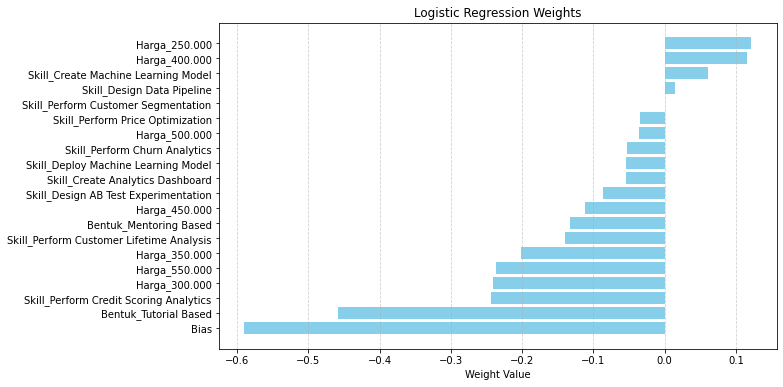

In [13]:
weights = weights.sort_values(by='Weight')

# Visualize weights
plt.figure(figsize=(10, 6))
plt.barh(weights['Feature'], weights['Weight'], color='skyblue',)
plt.xlabel('Weight Value')
plt.title('Logistic Regression Weights')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()
